In [ ]:
# このコードは変更しない
!pip install -U ccml2021
# You must restart the runtimeとメッセージが出たら、ランタイムを再起動する

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def move_vector_closer_to_largest_distribution(X, p):
    t = X.dot(p)/(p.T.dot(p))
    p_new = X.T.dot(t)/(t.T.dot(t))
    p_new = p_new/np.sqrt(p_new.T.dot(p_new))
    t_new = X.dot(p_new)

    diff_t = np.linalg.norm(t_new - t, ord=2)
    return p_new, diff_t

def plot_matrix_and_vector(X, p=None, lim=None):
    fig = plt.figure(figsize=[5, 5])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X[:, 0], X[:, 1], 'r.')
    if p is not None:
        ax.plot([0, p[0]], [0, p[1]], 'b')
    if lim is not None:
        ax.set_xlim(lim[0], lim[1])
        ax.set_ylim(lim[0], lim[1])
    plt.show()

In [3]:
num_sample = 50
X = np.zeros([num_sample, 2])
X[:, 0] = np.random.randn(X.shape[0])
X[:, 1] = X[:, 0] * 0.5
X[:, 0] += np.random.randn(X.shape[0]) * 0.3
X[:, 1] += np.random.randn(X.shape[0]) * 0.3
X = X - np.mean(X, axis=0)

p0 = np.array([1, 0])

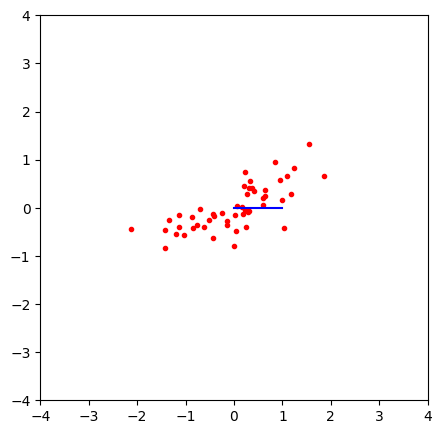

In [4]:
plot_matrix_and_vector(X, p0, [-4, 4])


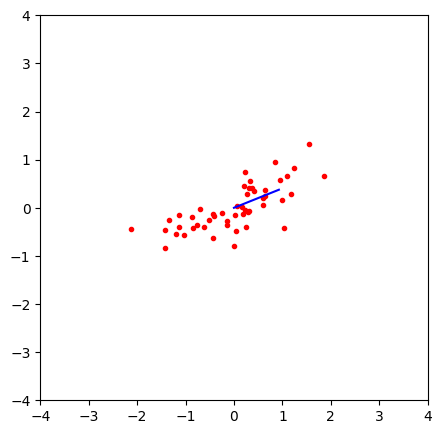

p = [0.92705121 0.37493473]
diff_t = 0.9716174341484909


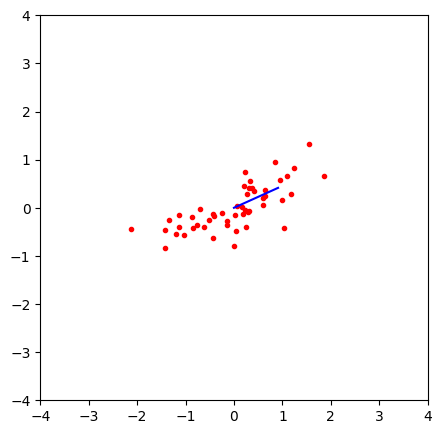

p = [0.91032576 0.4138925 ]
diff_t = 0.08856999286929845


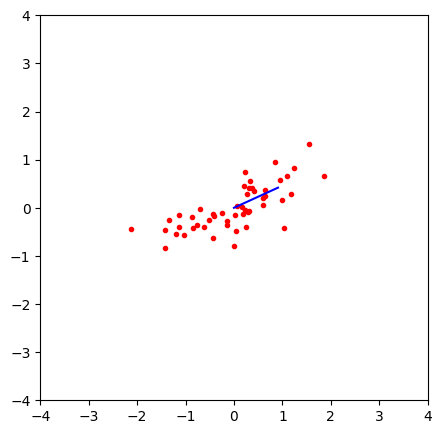

p = [0.90851363 0.41785523]
diff_t = 0.009076457673842103


In [5]:
p1, diff_t1 = move_vector_closer_to_largest_distribution(X, p0)
plot_matrix_and_vector(X, p1, [-4, 4])
print("p = {}".format(p1))
print("diff_t = {}".format(diff_t1))

p2, diff_t2 = move_vector_closer_to_largest_distribution(X, p1)
plot_matrix_and_vector(X, p2, [-4, 4])
print("p =", p2)
print("diff_t = {}".format(diff_t2))

p3, diff_t3 = move_vector_closer_to_largest_distribution(X, p2)
plot_matrix_and_vector(X, p3, [-4, 4])
print("p =", p3)
print("diff_t = {}".format(diff_t3))

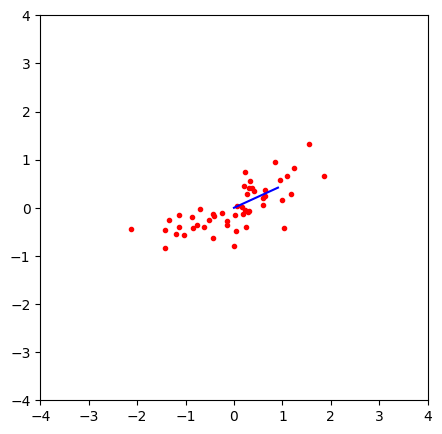

p = [0.90830515 0.4183082 ]
diff_t = 1.0362539198894758e-07


In [6]:
p = np.array([1, 0])
tolerance = 1e-6
diff_t = tolerance + 1

while diff_t > tolerance:
    p, diff_t = move_vector_closer_to_largest_distribution(X, p)

plot_matrix_and_vector(X, p, [-4, 4])
print("p =", p)
print("diff_t =", diff_t)

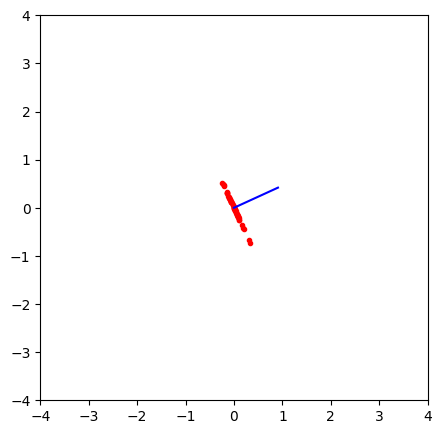

In [7]:
t = np.dot(X, p)
E = X - np.dot(t.reshape(-1, 1), p.reshape(1, -1))
plot_matrix_and_vector(E, p, [-4, 4])

In [8]:
import copy

class myPCA:
    def __init__(self, n_components=None, tolerance=1e-6):
        self.n_components = n_components
        self.tolerance = tolerance
    
    def fit(self, X):
        if self.n_components is None:
            self.n_components = X.shape[1]
        E = copy.deepcopy(X)
        self.P = np.zeros((E.shape[1], self.n_components))
        for ii in range(self.n_components):
            p = np.zeros(E.shape[1])
            p[0] = 1
            diff_t = self.tolerance + 1
            while diff_t > self.tolerance:
                p, diff_t = move_vector_closer_to_largest_distribution(E, p)
            t = np.dot(X, p)
            E = E - np.dot(t.reshape(-1, 1), p.reshape(1, -1))
            self.P[:, ii] = p
    
    def transform(self, X):
        return np.dot(X, self.P)

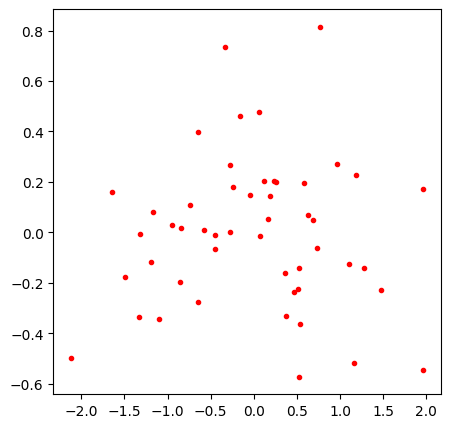

In [9]:
model = myPCA()
model.fit(X)
pc = model.transform(X)
plot_matrix_and_vector(pc)

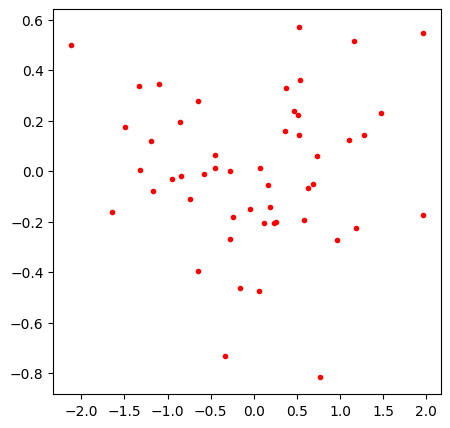

In [10]:
from sklearn.decomposition import PCA
model_sk = PCA(n_components=2)
model_sk.fit(X)
pc_sk = model_sk.transform(X)
plot_matrix_and_vector(pc_sk)

In [11]:
# iris
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

def plot_class_components(X, y, c, axis=(0, 1)):
    fig = plt.figure(figsize=[5, 5])
    ax = fig.add_subplot(1, 1, 1)
    for val, name, marker in c:
        ax.plot(X[y == val, axis[0]], X[y == val, axis[1]], marker, label=name)
    ax.legend()
    plt.show()

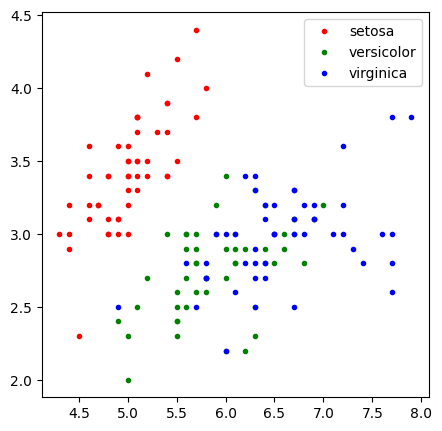

In [12]:
c = [[0, target_names[0], 'r.'],
     [1, target_names[1], 'g.'],
     [2, target_names[2], 'b.']]
plot_class_components(X, y, c, axis=(0, 1))

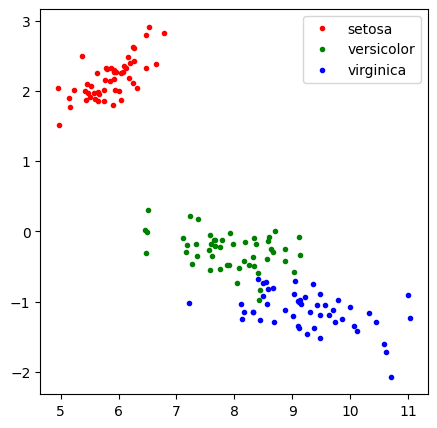

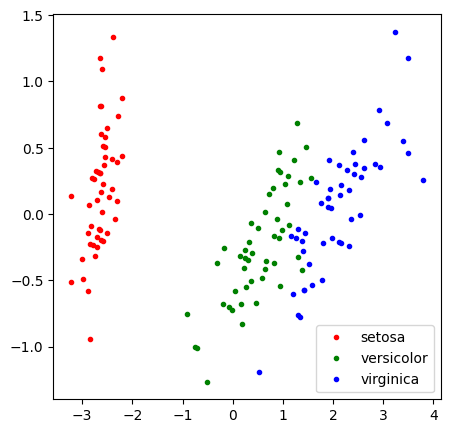

In [14]:
model = myPCA()
model.fit(X)
pc = model.transform(X)
plot_class_components(pc, y, c, axis=(0, 1))

model_sk = PCA(n_components=4)
model_sk.fit(X)
pc_sk = model_sk.transform(X)
plot_class_components(pc_sk, y, c, axis=(0, 1))

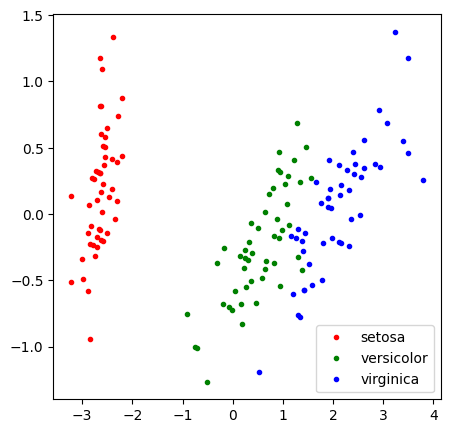

In [15]:
# 平均0にしたデータを使う
mean_X = np.mean(X, axis=0)
X_centered = X - mean_X

model = myPCA()
model.fit(X_centered)
pc = model.transform(X_centered)
plot_class_components(pc, y, c, axis=(0, 1))

## 考察記入欄
主成分分析は、多次元データを低次元に射影することで、データの分散が大きい方向を抽出する手法である。実験結果からわかるように、多次元のデータをそのままプロットすると特徴量を把握しずらいが、主成分のみを取り出すことで情報量の多いものだけを考えることができる。主成分分析は、情報量が多いものに対して有効で、例えば顔画像認識などで高次元のピクセル情報から特徴を抽出し、低次元の空間で分布を可視化することで、表情の違いなどを捉えることができるのではないかと考える。

## 感想記入欄

NIPALSアルゴリズムを用いた主成分分析により、多次元データから主要な方向を抽出することで、アヤメの品種間の違いが明確に浮かび上がりました。元データでは3種類の品種が重なって分析が難しい状態でしたが、抽出された主成分により分布が整理され、各クラスターがより明瞭に分離されました。

## 変数名、ファイル名の最終チェック

以下のコードは変更しないでください。

実行することで、上のコードが想定通りの変数名、ファイル名を使用しているかをチェックできます。

In [ ]:
from ccml2021.checker import app2

app2(globals())